In [20]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "05-Matplotlib_Homework_Pymaceuticals_data_mouse_drug_data.csv"
clinical_trial_data_to_load = "05-Matplotlib_Homework_Pymaceuticals_data_clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_info = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_info, trial_data, on = "Mouse ID")

# Display the data table for preview

combined_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [21]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

drug_timepoint_group = combined_data.groupby(['Drug', 'Timepoint'])

mean_tumor_volume = drug_timepoint_group.mean()['Tumor Volume (mm3)']

# Convert to DataFrame

mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)

# Preview DataFrame

mean_tumor_volume_df = mean_tumor_volume_df.reset_index()

mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [22]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

sem_tumor = drug_timepoint_group.sem()['Tumor Volume (mm3)']

# Convert to DataFrame

sem_tumor_df = pd.DataFrame(sem_tumor).rename(columns = {'Tumor Volume (mm3)' : 'Standard Error in Tumor Volume'})

# Preview DataFrame

sem_tumor_df = sem_tumor_df.reset_index()

sem_tumor_df.head(20)

,Drug,Timepoint,Standard Error in Tumor Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [36]:
# Minor Data Munging to Re-Format the Data Frames

pivot_mean_tumor_volume_df = mean_tumor_volume_df.pivot(index="Timepoint", columns="Drug", values='Tumor Volume (mm3)')

pivot_sem_tumor_df = sem_tumor_df.pivot(index="Timepoint", columns="Drug", values='Standard Error in Tumor Volume')

# Preview that Reformatting worked

pivot_mean_tumor_volume_df

pivot_sem_tumor_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


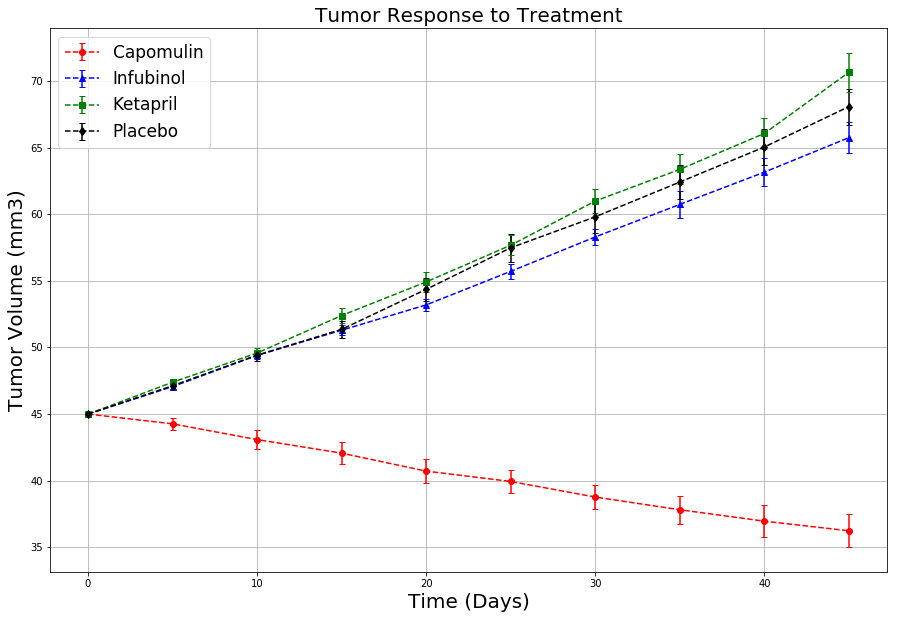

In [24]:
# Generate the Plot (with Error Bars)

drug = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

color = ['r', 'b', 'g', 'k']

marker = ['o', '^', 's', 'd']

drug_zip = zip(drug, color, marker) #tuple  with [(drug1, color1, marker1), (drug2, color2, marker2),....]

plt.figure(figsize = (15, 10))
plt.grid()

# Loop through tuples (from zip) in order to plot points for selected drugs - with error bars

for drug, color, marker in drug_zip:
    plt.errorbar(pivot_mean_tumor_volume_df.index,     # x-values from index (timepoint is the index)
                 pivot_mean_tumor_volume_df[drug],     # y-values from tumor volume of that drug
                 yerr = pivot_sem_tumor_df[drug],      # standard error for that drug
                 color = color,                        # color from zipped tuples
                 marker = marker,                      # marker from zipped tuples
                 linestyle = '--', 
                 capthick = 1,                         # for caps on error bars
                 capsize = 3)
    

plt.title('Tumor Response to Treatment', fontsize = 20)
plt.xlabel('Time (Days)', fontsize = 20)
plt.ylabel('Tumor Volume (mm3)', fontsize = 20)
plt.legend(loc = 'best', fontsize = 17)

# Save the Figure

#plt.savefig('Tumor Response to Treatment.png')

In [25]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [26]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_metsite_data = drug_timepoint_group.mean()['Metastatic Sites']

# Convert to DataFrame

mean_metsite_data_df = pd.DataFrame(mean_metsite_data)

# Preview DataFrame

mean_metsite_data_df = mean_metsite_data_df.reset_index()

mean_metsite_data_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [27]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

sem_metsites = drug_timepoint_group.sem()['Metastatic Sites']

# Convert to DataFrame

sem_metsites_df = pd.DataFrame(sem_metsites).rename(columns = {'Metastatic Sites' : 'Standard Error in Metastatic Sites'})

# Preview DataFrame

sem_metsites_df = sem_metsites_df.reset_index()

sem_metsites_df

,Drug,Timepoint,Standard Error in Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [33]:
# Minor Data Munging to Re-Format the Data Frames

pivot_mean_metsite_data_df = mean_metsite_data_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

pivot_sem_metsites_df = sem_metsites_df.pivot(index='Timepoint', columns='Drug', values= 'Standard Error in Metastatic Sites')

# Preview that Reformatting worked

pivot_mean_metsite_data_df
pivot_sem_metsites_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [ ]:
# x-values from index (timepoint is the index)
                 pivot_mean_tumor_volume_df[drug],     # y-values from tumor volume of that drug
                 yerr = pivot_sem_tumor_df[drug],      # standard error for that drug
                 color = color,                        # color from zipped tuples
                 marker = marker,                      # marker from zipped tuples
                 linestyle = '--', 
                 capthick = 1,                         # for caps on error bars
                 capsize = 3)

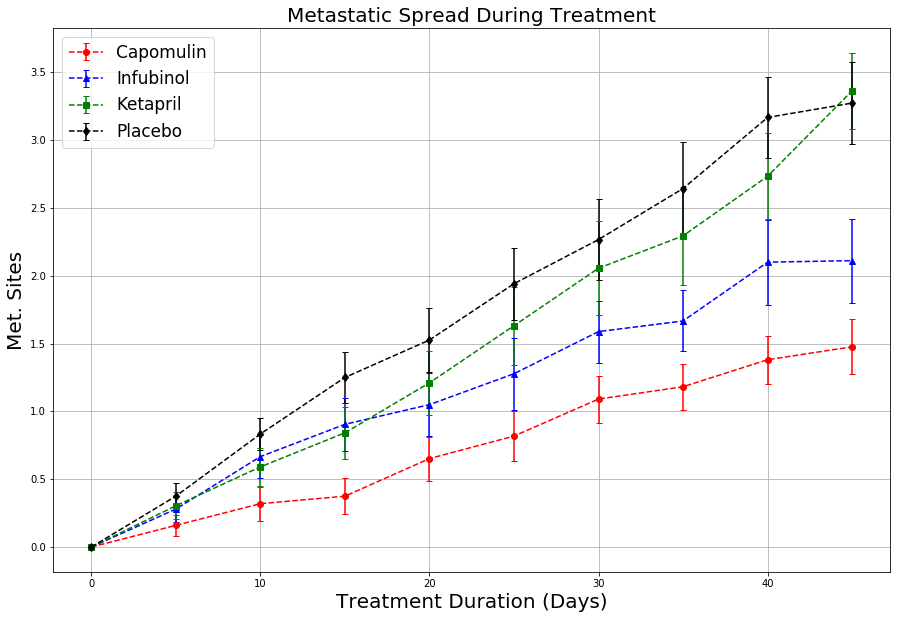

In [41]:
# Generate the Plot (with Error Bars)

drug = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

color = ['r', 'b', 'g', 'k']

marker = ['o', '^', 's', 'd']

drug_zip = zip(drug, color, marker) #tuple  with [(drug1, color1, marker1), (drug2, color2, marker2),....]

plt.figure(figsize = (15, 10))
plt.grid()

# Loop through tuples (from zip) in order to plot points for selected drugs - with error bars

for drug, color, marker in drug_zip:
    plt.errorbar(pivot_mean_metsite_data_df.index,         # x-values from index (timepoint is the index)
                 pivot_mean_metsite_data_df[drug],         # y-values from tumor volume of that drug
                 yerr = pivot_sem_metsites_df[drug],       # standard error for that drug
                 color = color,                            # color from zipped tuples
                 marker = marker,                          # marker from zipped tuples
                 linestyle = '--',
                 capthick = 1,                             # for caps on error bars
                 capsize = 3)
    
    
plt.title('Metastatic Spread During Treatment', fontsize = 20)
plt.xlabel('Treatment Duration (Days)', fontsize = 20)
plt.ylabel('Met. Sites', fontsize = 20)
plt.legend(loc = 'best', fontsize = 17)

# Save the Figure

plt.savefig('Metastatic Spread During Treatment.png')

# Show the Figure
plt.show()

## Survival Rates

In [42]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

df = drug_timepoint_group.count().reset_index()

# Grab only necessary columns and rename Mouse ID column
mice_count_df = df.iloc[:, 0:3]
mice_count_df = mice_count_df.rename(columns = {"Mouse ID" : "Mouse Count"})

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [44]:
# Minor Data Munging to Re-Format the Data Frames

mice_count_df = mice_count_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse Count')

# Preview the Data Frame

mice_count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


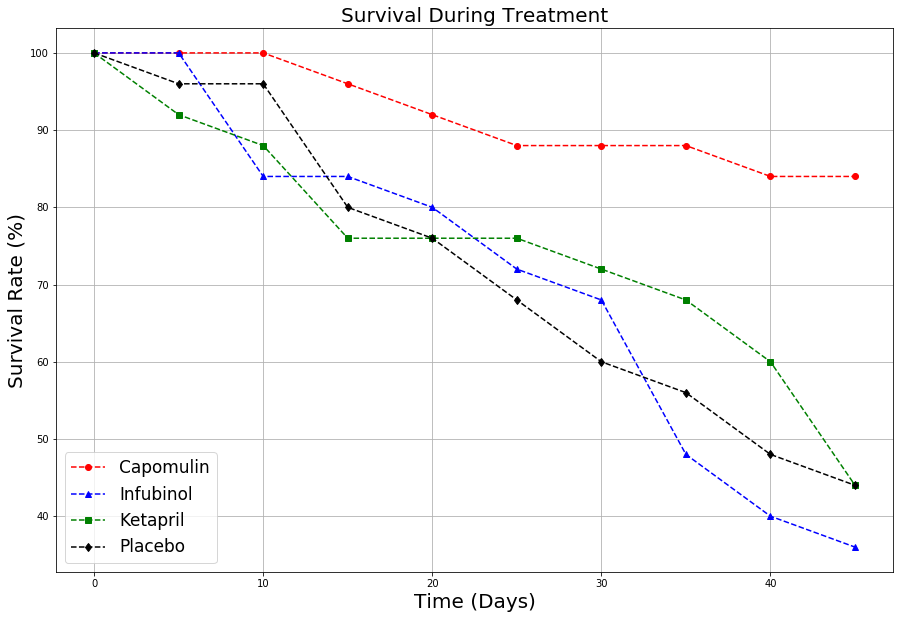

In [59]:
# Generate the Plot (Accounting for percentages)

color = ['r', 'b', 'g', 'k']

marker = ['o', '^', 's', 'd']

plt.figure(figsize = (15, 10))
plt.grid()

# Initialize count for 'color' and 'marker' lists to use in loop below
count = 0

# Loop through drug columns in mice_count_df to plot points

for t in mice_count_df.iloc[:, [0, 2, 3, 5]]:                        # selects only those 4 drug columns
    
    survival_rate = mice_count_df[t]/mice_count_df.loc[0,t] * 100    # calculates survival rate for each timepoint
    
    plt.plot(mice_count_df.index,                                    # x-values from index (timepoint is the index)
             survival_rate,                                          # y-values are the survival rate for that timepoint
            color = color[count],                                    # selecting the color from the list of colors
            marker = marker[count],                                  # selecting the marker from the list of markers
            linestyle = '--')
    
    count += 1          # incrementing the count for the next iteration, so that the next color and marker will be selected
    
plt.title('Survival During Treatment', fontsize = 20)
plt.xlabel('Time (Days)', fontsize = 20)
plt.ylabel('Survival Rate (%)', fontsize = 20)
plt.legend(loc = 3, fontsize = 17)              # location 3 is at lower left of figure

# Save the Figure

#plt.savefig('Survival During Treatment.png')

# Show the Figure
plt.show()

In [ ]:
#Fail/Pass
plt.bamethod(df['Values'], df['F/P']=='Fail', col="green")

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()